<a href="https://colab.research.google.com/github/visiont3lab/machine-learning-course/blob/main/visualization/ClassNote_2_12_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Esercizio

## Capire i Dati

In [4]:
%load_ext google.colab.data_table 
#%unload_ext google.colab.data_table 

In [5]:
import pandas as pd
import numpy as np
dati_italia = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
data = pd.read_csv(dati_italia)
data.head()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,NaN,NaN,229,4324,NaN,NaN,NaN,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,NaN,NaN,322,8623,NaN,NaN,NaN,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,NaN,NaN,400,9587,NaN,NaN,NaN,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,NaN,NaN,650,12014,NaN,NaN,NaN,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,NaN,NaN,888,15695,NaN,NaN,NaN,NaN,NaN


## Graficare dimessi guariti, deceduti, totale positivi vs data

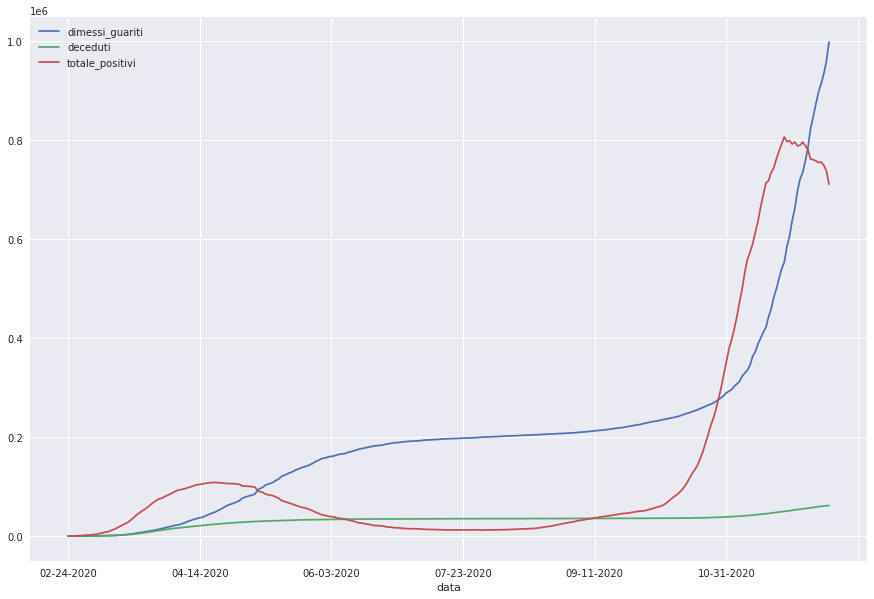

In [7]:
from matplotlib import pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
dati_italia = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
data = pd.read_csv(dati_italia)

l = ["data","dimessi_guariti","deceduti","totale_positivi"]
dn = data[l]
#dn.set_index("data").plot(kind="line", figsize=(15,8))

# Conversion String to Datetime
listaDate = pd.to_datetime(data["data"]) 
listDatetime = [d.to_pydatetime() for d in listaDate.tolist()]

# Add new column
dn.loc[:]["dataDatetime"]=listDatetime

'''
lnew = []
for el in listDatetime:
  lnew.append(el.strftime("%m-%d"))
dn["data"] = lnew
'''
lnew = [el.strftime("%m-%d-%Y") for el in listDatetime]

#dn["data"] =lnew          #not best
#dn.loc[:,("data")] = lnew # Not best
dn.loc[:]["data"] = lnew #  Correct

# List matplotlib style available  plt.style.available
#with plt.style.context("dark_background"):   
with plt.style.context("seaborn"):   
    dn.set_index("data").plot(y=["dimessi_guariti","deceduti","totale_positivi"],kind="line", figsize=(15,10))


## Plotly figure

In [8]:
 !pip install plotly==4.12.0 kaleido

In [12]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
dati_italia = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
data = pd.read_csv(dati_italia)

l = ["data","dimessi_guariti","deceduti","totale_positivi"]
dn = data[l]

fig = go.Figure()
fig.add_trace(go.Scatter(x=dn["data"].tolist(), y=dn["dimessi_guariti"],
                      mode='lines+markers',
                      name="dimessi_guariti"))
fig.add_trace(go.Scatter(x=dn["data"].tolist(), y=dn["totale_positivi"],
                      mode='markers',
                      name="totale_positivi"))
fig.add_trace(go.Scatter(x=dn["data"].tolist(), y=dn["deceduti"],
                      mode='lines',
                      name="deceduti"))
'''
fig.update_layout(
    hovermode = "x",
    paper_bgcolor = "rgb(0,0,0)" ,
    plot_bgcolor = "rgb(10,10,10)" , 
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    title=dict(
        x = 0.5,
        text = "title",
        font=dict(
            size = 20,
            color = "rgb(255,255,255)"
        )
    )
)
'''
fig.update_layout(
    paper_bgcolor = "rgb(50,50,50)",
    plot_bgcolor = "#F5F5F5",
    title_text = "My Custom Plot",
    title_font_size = 50,
    font_color ="rgb(255,255,255)",
    xaxis_showgrid=False,
    yaxis_showgrid=False,
)


fig.show()
fig.write_html('fig.html', auto_open=False)
fig.write_image('fig.png' )

## Plotly figure function

In [19]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
dati_italia = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
data = pd.read_csv(dati_italia)

# Funzione
df = data.copy()
Y = ["dimessi_guariti","totale_positivi"]
names = ["DIMMESSI GUARITI", "TOTALE POSITIVI"]

def myplot(df, x="data",ys=["dimessi_guariti","totale_positivi"], names=["DIMMESSI GUARITI", "TOTALE POSITIVI"]):
  fig = go.Figure()
  
  for y,name in zip(ys,names): 
    fig.add_trace(go.Scatter(x=df[x], y=df[y],
                          mode='lines',
                          name=name))
  fig.update_layout(
      hovermode = "x",
      paper_bgcolor = "rgb(30,30,30)" ,
      plot_bgcolor = "rgb(60,60,60)" , 
      xaxis_showgrid=False,
      yaxis_showgrid=False,
      title=dict(
          x = 0.5,
          text = "PLOT",
          font=dict(
              size = 30,
              color = "rgb(255,255,255)"
          )
      ),
      font_color="rgb(255,255,255)",
      font_size=20
  )
  return fig

fig1 = myplot(df, x="data", ys=["variazione_totale_positivi"],names="var")
fig2 = myplot(df, x="data", ys=["deceduti","terapia_intensiva"],names=["deceduti", "terapia_intensiva"])
fig3 = myplot(df, x="data", ys=["dimessi_guariti","totale_casi"],names=["dimessi", "casi"])

fig1.show()
fig2.show()
fig3.show()

#fig.write_html('fig.html', auto_open=False)
#fig.write_image('fig.png' )

## Datetime Conversion

In [ ]:
from datetime import datetime
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
dati_italia = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
data = pd.read_csv(dati_italia)

l = ["data","dimessi_guariti","deceduti","totale_positivi"]
dn = data[l]
#dn.set_index("data").plot(kind="line", figsize=(15,8))

# Conversion String to Datetime
listaDate = pd.to_datetime(data["data"]) #, format='%Y-%m-%dT%H:%M:%S', errors='ignore') # pandas timestamp datetime
listDatetime = [d.to_pydatetime() for d in listaDate.tolist()]
dn["data"] = listDatetime

# Select by date
dn[dn["data"].dt.date==datetime(2020,11,1).date()]
#dn[dn["data"].dt.date>datetime(2020,9,1).date()]



,data,dimessi_guariti,deceduti,totale_positivi
251,2020-11-01 17:00:00,292380,38826,378129


## Matplolib Example

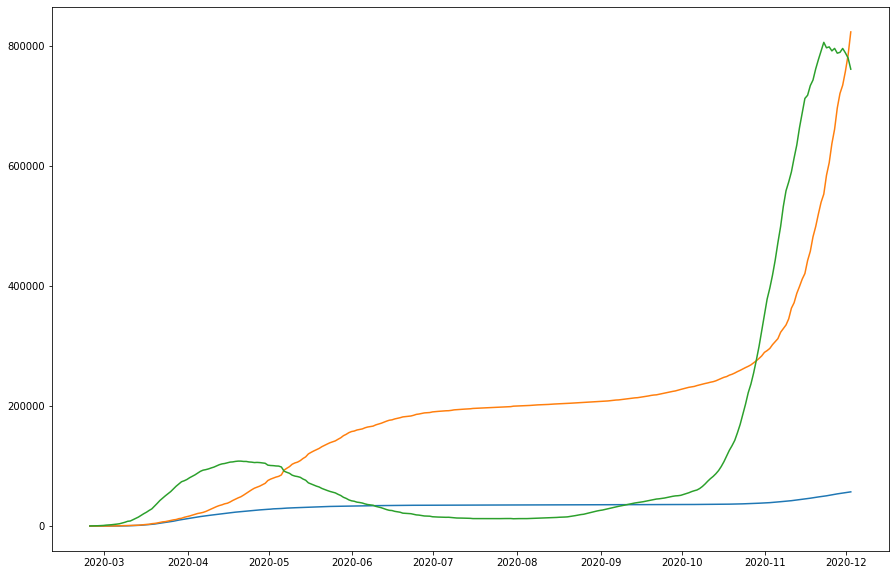

In [ ]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
dati_italia = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv" 
data = pd.read_csv(dati_italia) 
data["data"] = pd.to_datetime(data["data"])

small_data = data[["data","dimessi_guariti","deceduti","totale_positivi"]] 

X = small_data["data"].tolist()
Y1 = small_data["deceduti"].tolist()
Y2 = small_data["dimessi_guariti"].tolist()
Y3 = small_data["totale_positivi"].tolist()

fig = plt.figure(figsize=(15,10))
plt.plot(X,Y1)
plt.plot(X,Y2)
plt.plot(X,Y3)
plt.show()
